# Introduction to Databricks

## Introduction

First, there were data warehouses. They stored data in rows and columns because all the Internet and computers of the time were capable of distributing was simple text information. Much later came data lakes - they could store nearly any type of data you could collect. They were great for the social media and YouTube age. 

But they both had disadvantages - data warehouses were expensive and unsuitable for modern data science while data lakes were messy and often turned into data swamps. So, companies started having two separate tech stacks - warehouses for BI and analytics, lakes for machine learning. 

But managing two different data architectures was such a pain that companies often had poor results. This issue gave rise to the __lakehouse architecture__, which is precisely what Databricks is famous for. 

Databricks is a cloud-based platform that allows users to derive value from both warehouses and lakes in a unified environment. This article will give overview of the platform, showing its most important features and how to use them.

## What we will cover in this tutorial?

Databricks is such a massive platform that its documentation itself could be turned into a book. So, the article's goal is to provide you with a concepts hierarchy - linearly ordered explanations of Databricks features that will take you from a clueless beginner to a decent Databricks practitioner. 

So, here is the table of contents:

PASTE THE TABLE OF CONTENTS HERE.

## 0. Databricks as a platform

When you read the word Databricks, you should immediately think of it as a platform, not as some framework or Python library. Typically, platforms offer a wide range of features and Databricks isn't an exception. It is one of the very few platforms that can be used by any data professional, from data engineers to the modern machine learning engineers (or what the press calls AI programmers). 

Databricks has the following core components:

1. Workspace: Databricks provides a centralized environment where teams can collaborate without any hassles. The environment is accessible through a user-friendly web interface.
2. Notebooks: Databricks has a version of Jupyter notebooks specifically designed for collaboration and flexibility.
3. Apache Spark: Databricks loves Apache Spark. It is the engine that powers all parallel processing of humongous datasets, making it suitable for big data analytics.
4. Delta Lake: an enhancement on data lakes by providing ACID transactions. Delta Lakes ensure data reliability and consistency, addressing traditional challenges associated with data lakes.
5. Scalability: the platform scales horizontally, rather than vertically, which is ideally suited for organizations dealing with ever-increasing data demands. 

These components in combination unlock a wide range of benefits:

- Cross-team collaboration: engineers, analysts, scientists and ML engineers can work seamlessly in the same platform.
- Consistency: with notebooks, users can transition between tasks and programming languages without the need for context-switching. 
- Efficient workflows: Users can perform tasks such as data cleaning, transformation and machine learning in a cohesive manner
- Integrated data management: users can ingest data into the platform multiple sources (a lakehouse), create tables and run SQL
- Real-time collaboration: shared notebooks and collaborative editing features enable real-time collaboration. Multiple team members can work on the same notebook simultaneously. 

If I've got you convinced of Databricks' importance in the data world, let's get you up and running with the platform. 

## 1. Account Setup

To set up you account, go to https://www.databricks.com/try-databricks and sign up for the Community Edition.

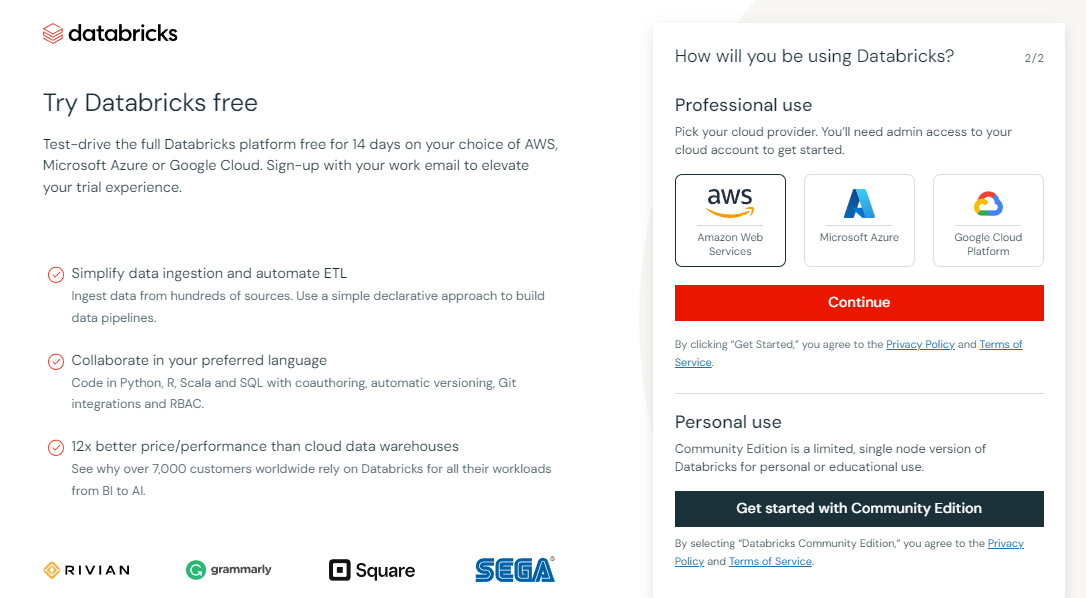

Community Edition has less features than the Enterprise version but it doesn't require a cloud-provider set up which is great for small-use cases like tutorials.

If you have this page after email verification, you are good to go:

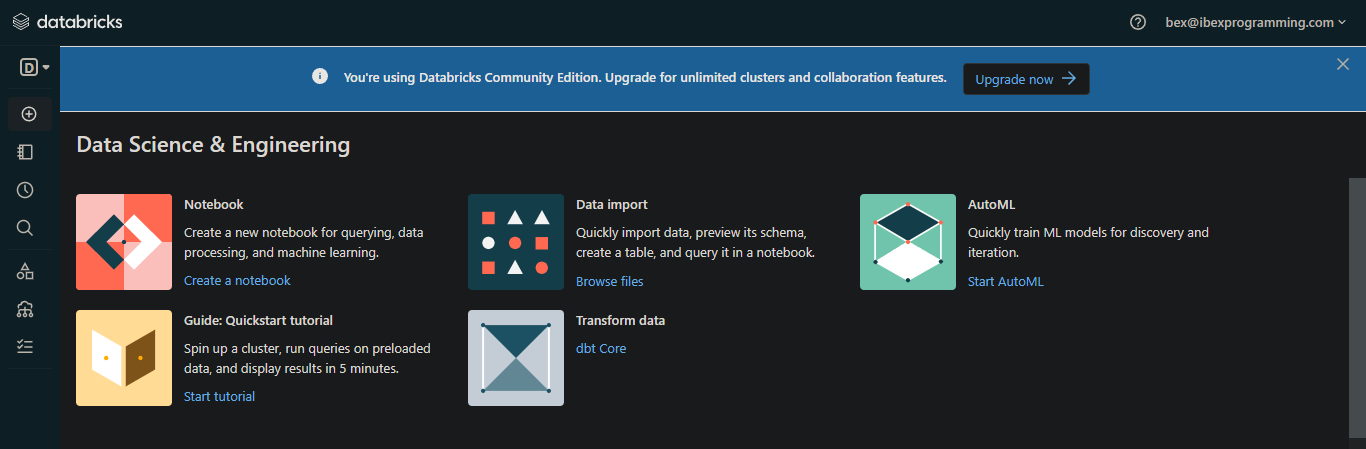

## 2. Databricks Workspace

## 3. Clusters

## 4. Data Ingestion

## 5. Notebooks

## 6. Jobs

## 7. Tables

## 8. SQL Queries

## 9. Delta Lake

## 10. Data Visualization

## Conclusion